# Day 18: Settlers of The North Pole

In [80]:
import numpy as np

OPEN = 0
TREE = 1
LUMB = 2

def getArea(filename):
    with open(filename) as f:
        lines = [l.strip("\n") for l in f.readlines()]
        area = np.zeros((len(lines),len(lines[0])),dtype=int)
        for y in range(len(lines)):
            for x in range(len(lines[0])):
                if lines[y][x]=="#":
                    area[y][x]=LUMB
                elif lines[y][x]=="|":
                    area[y][x]=TREE
        return area
                
def getAdiacent(p,area):
    x,y = p
    return [ (x+i,y+j) for i in (-1,0,1) for j in (-1,0,1) if 0<=x+i<len(area) and 0<=y+j<len(area) and not i==j==0 ]

def countTrees(p,area):
    trees = 0
    lumbs = 0
    for a in getAdiacent(p,area):
        xa,ya = a
        if area[ya][xa]==TREE:
            trees +=1
        elif area[ya][xa]==LUMB:
            lumbs +=1
    return trees, lumbs

from copy import deepcopy

def evolveArea(area):
    areanew = deepcopy(area)
    for y in range(len(area)):
        for x in range(len(area[0])):
            p = (x,y)
            t,l = countTrees(p,area)
            if area[y][x]==OPEN:
                if t>=3:
                    areanew[y][x]=TREE
                else:
                    areanew[y][x]=OPEN
            elif area[y][x]==TREE:
                if l>=3:
                    areanew[y][x]=LUMB
                else:
                    areanew[y][x]=TREE
            elif area[y][x]==LUMB:
                if l>=1 and t>=1:
                    areanew[y][x]=LUMB
                else:
                    areanew[y][x]=OPEN
    resource = sum(areanew[areanew==TREE])//TREE*sum(areanew[areanew==LUMB])//LUMB
    return areanew,resource

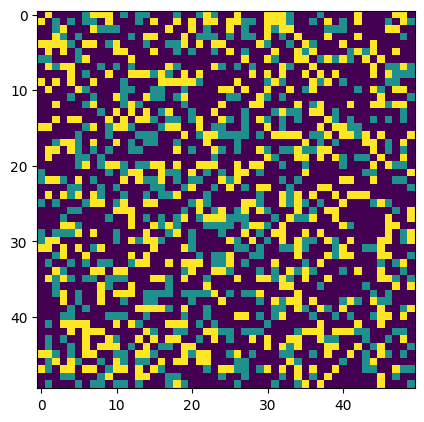

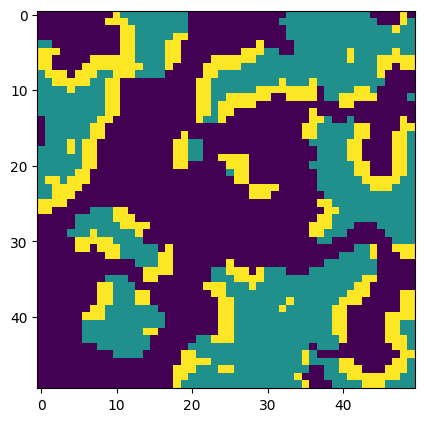

Resources = 360720


In [91]:
import matplotlib.pyplot as plt

#filename = "data/day18text.txt"
filename = "data/input18.txt"

area = getArea(filename)

plt.figure(figsize=(5,5),dpi=100)
s = plt.imshow(area)
plt.show()

for _ in range(10):
    areanew,r = evolveArea(area)
    area = deepcopy(areanew)

plt.figure(figsize=(5,5),dpi=100)
s = plt.imshow(area)
plt.show()
    
print("Resources =",r)

## Part 2

In [109]:
from collections import defaultdict

filename = "data/input18.txt"
area = getArea(filename)

history = defaultdict(bool)

#longtime = 1000000000
longtime = 1000
T=[]
R=[]

for m in range(1,longtime+1):
    areanew,r = evolveArea(area)
    if history[r] and m>500:
        #print("Found period at minute",m,"with resources =",r)
        #break
        T.append(m)
        R.append(r)
    else:
        history[r]=True
    area = deepcopy(areanew)

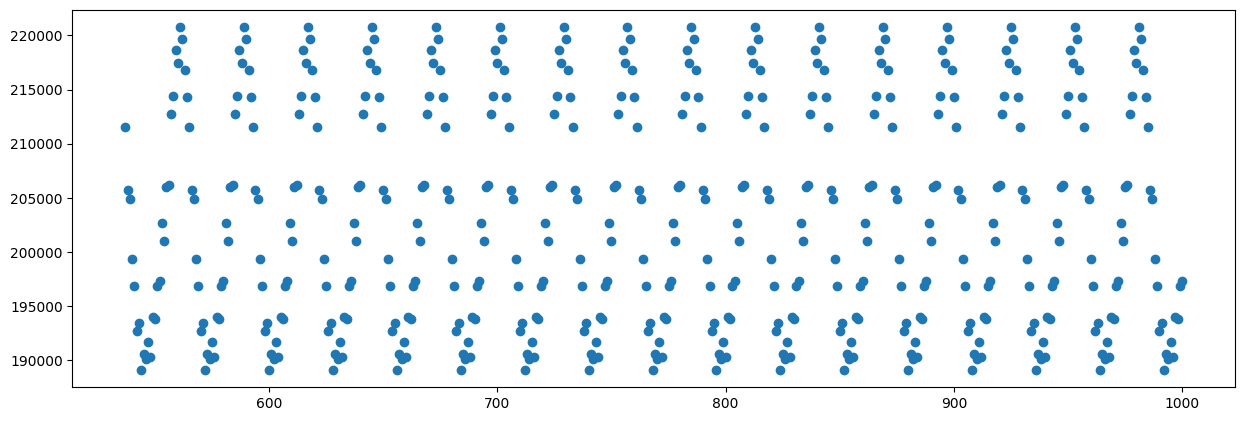

In [110]:
plt.figure(figsize=(15,5),dpi=100)
plt.scatter(T,R)

In [147]:
def getResources(t,T,R):
    r0 = R[0]
    t0 = T[0]
    d = 0
    for _t,_r in zip(T,R):
        if _r==r0 and _t!=T[0]:
            d = _t-T[0]
            break
    return R[(t-t0)%d]

In [148]:
filename = "data/input18.txt"
area = getArea(filename)

t = 800

for m in range(1,t+1):
    areanew,r = evolveArea(area)
    area = deepcopy(areanew)

print(r)
print(getResources(800,T,R))

190314
190314


In [149]:
print(getResources(1000000000,T,R))

197276
